In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing credit csv file to DataFrame
data = pd.read_csv(r"H:\MS Arizona\Machine Learning Assignments\Final Project German Bank Loan\credit.csv")
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [4]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
# checking for missing values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
# Apply one-hot encoding to "purpose" column
data = pd.get_dummies(data, columns=['purpose'], prefix='purpose')
columns_to_replace = ['purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations']

# Loop through columns and replace True with 1 and False with 0
for col in columns_to_replace:
    data[col] = data[col].astype(int)

# Apply label encoding to other categorical columns
label_encoder = LabelEncoder()
for col in ['checking_balance', 'credit_history', 'savings_balance', 'employment_duration', 
            'other_credit', 'housing', 'job', 'phone']:
    data[col] = label_encoder.fit_transform(data[col])

# Encode target variable
data['default_encoded'] = label_encoder.fit_transform(data['default'])

# Drop original target column and any other columns not suitable for the model
data.drop(columns=['default'], inplace=True)
data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,...,job,dependents,phone,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,default_encoded
0,1,6,0,1169,4,3,4,4,67,1,...,1,1,1,0,0,0,0,1,0,0
1,0,48,1,5951,2,0,2,2,22,1,...,1,1,0,0,0,0,0,1,0,1
2,3,12,0,2096,2,1,2,3,49,1,...,3,2,0,0,0,0,1,0,0,0
3,1,42,1,7882,2,1,2,4,45,1,...,1,2,0,0,0,0,0,1,0,0
4,1,24,3,4870,2,0,3,4,53,1,...,1,2,0,0,1,0,0,0,0,1


C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

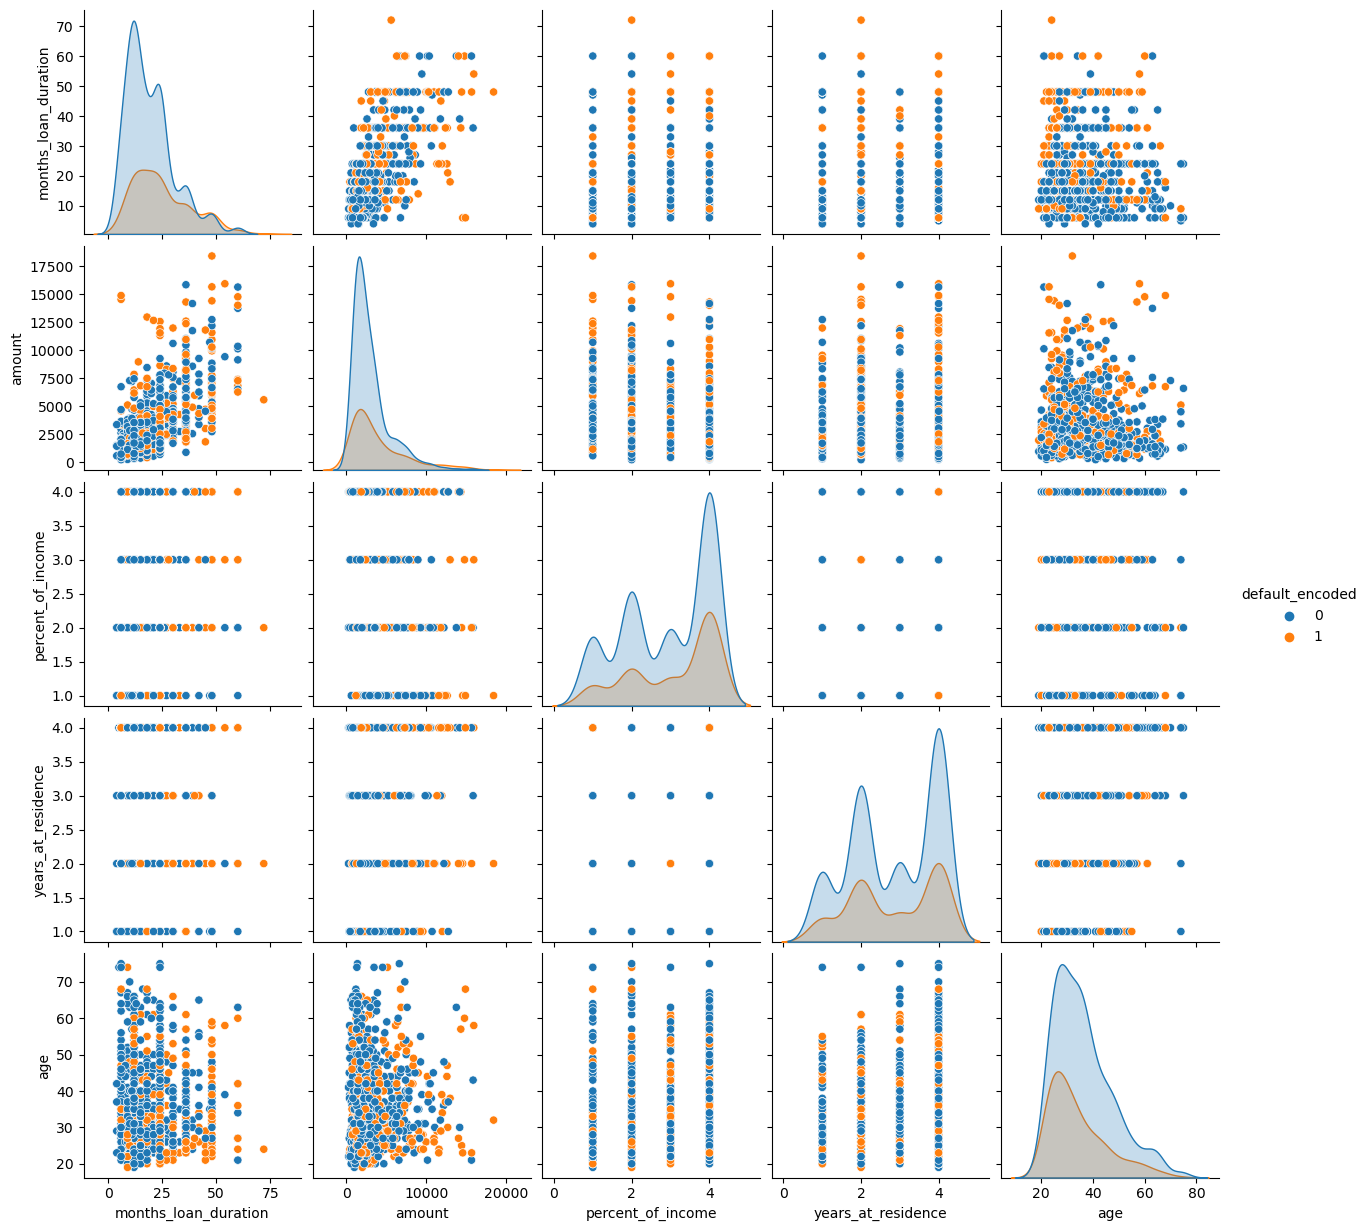

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for pairplot
numerical_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age']

# Add the target variable to the selected features
features_with_target = numerical_features + ['default_encoded']

# Create pairplot
sns.pairplot(data=data[features_with_target], hue='default_encoded', diag_kind='kde')
plt.show()


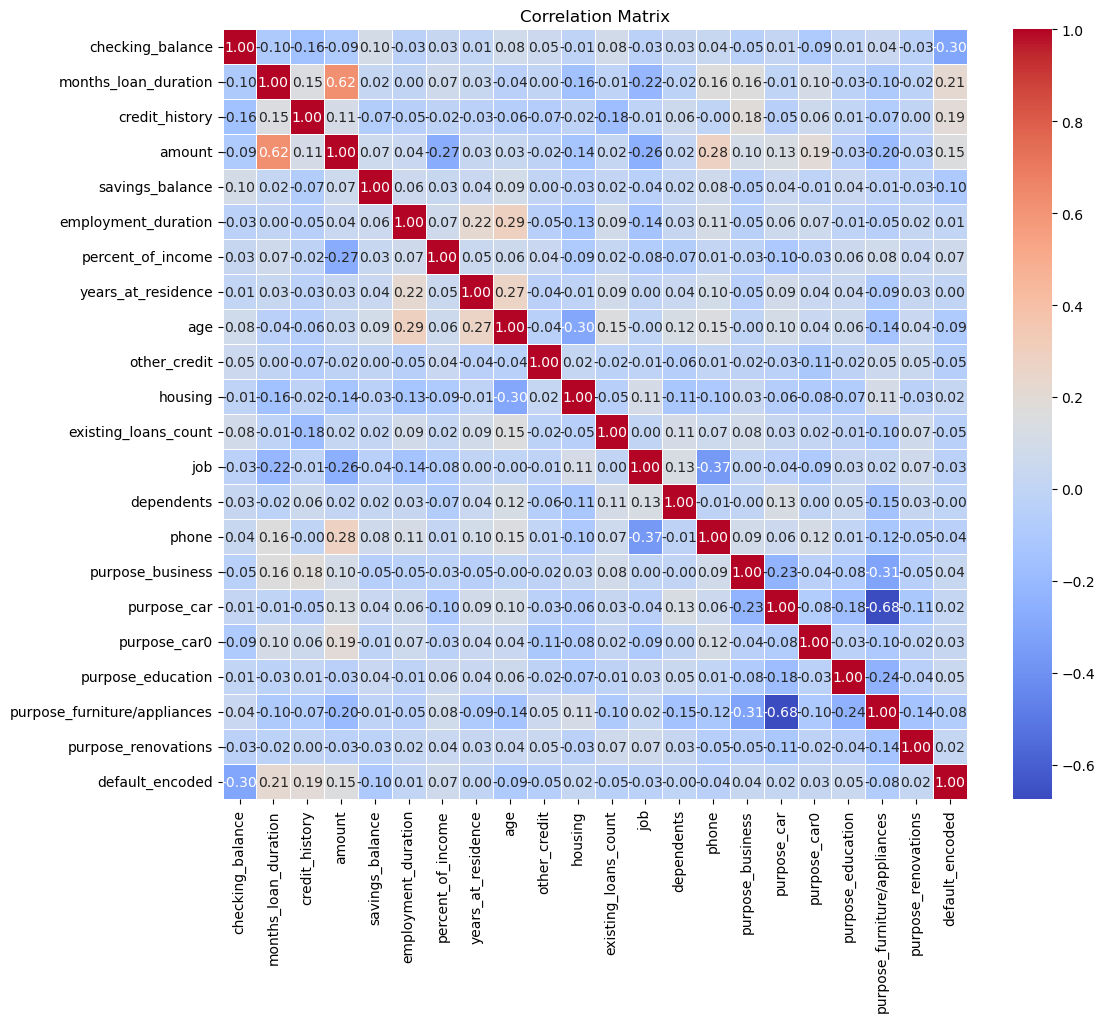

In [8]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

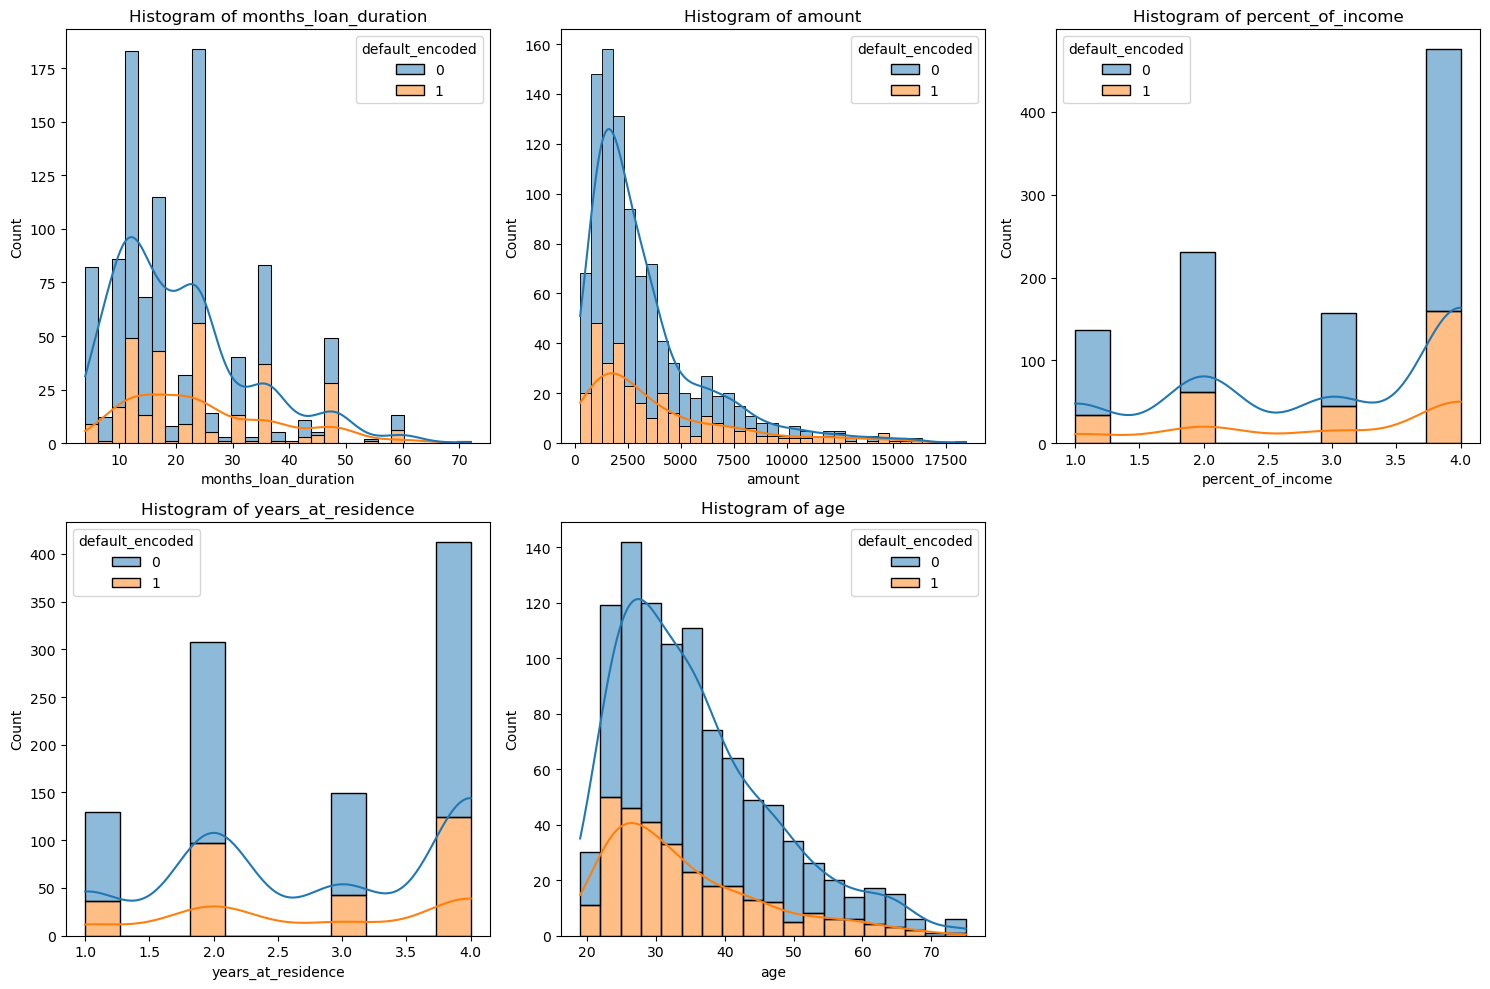

In [9]:

# Plot histograms for numerical features based on default status
numerical_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='default_encoded', kde=True, multiple='stack')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


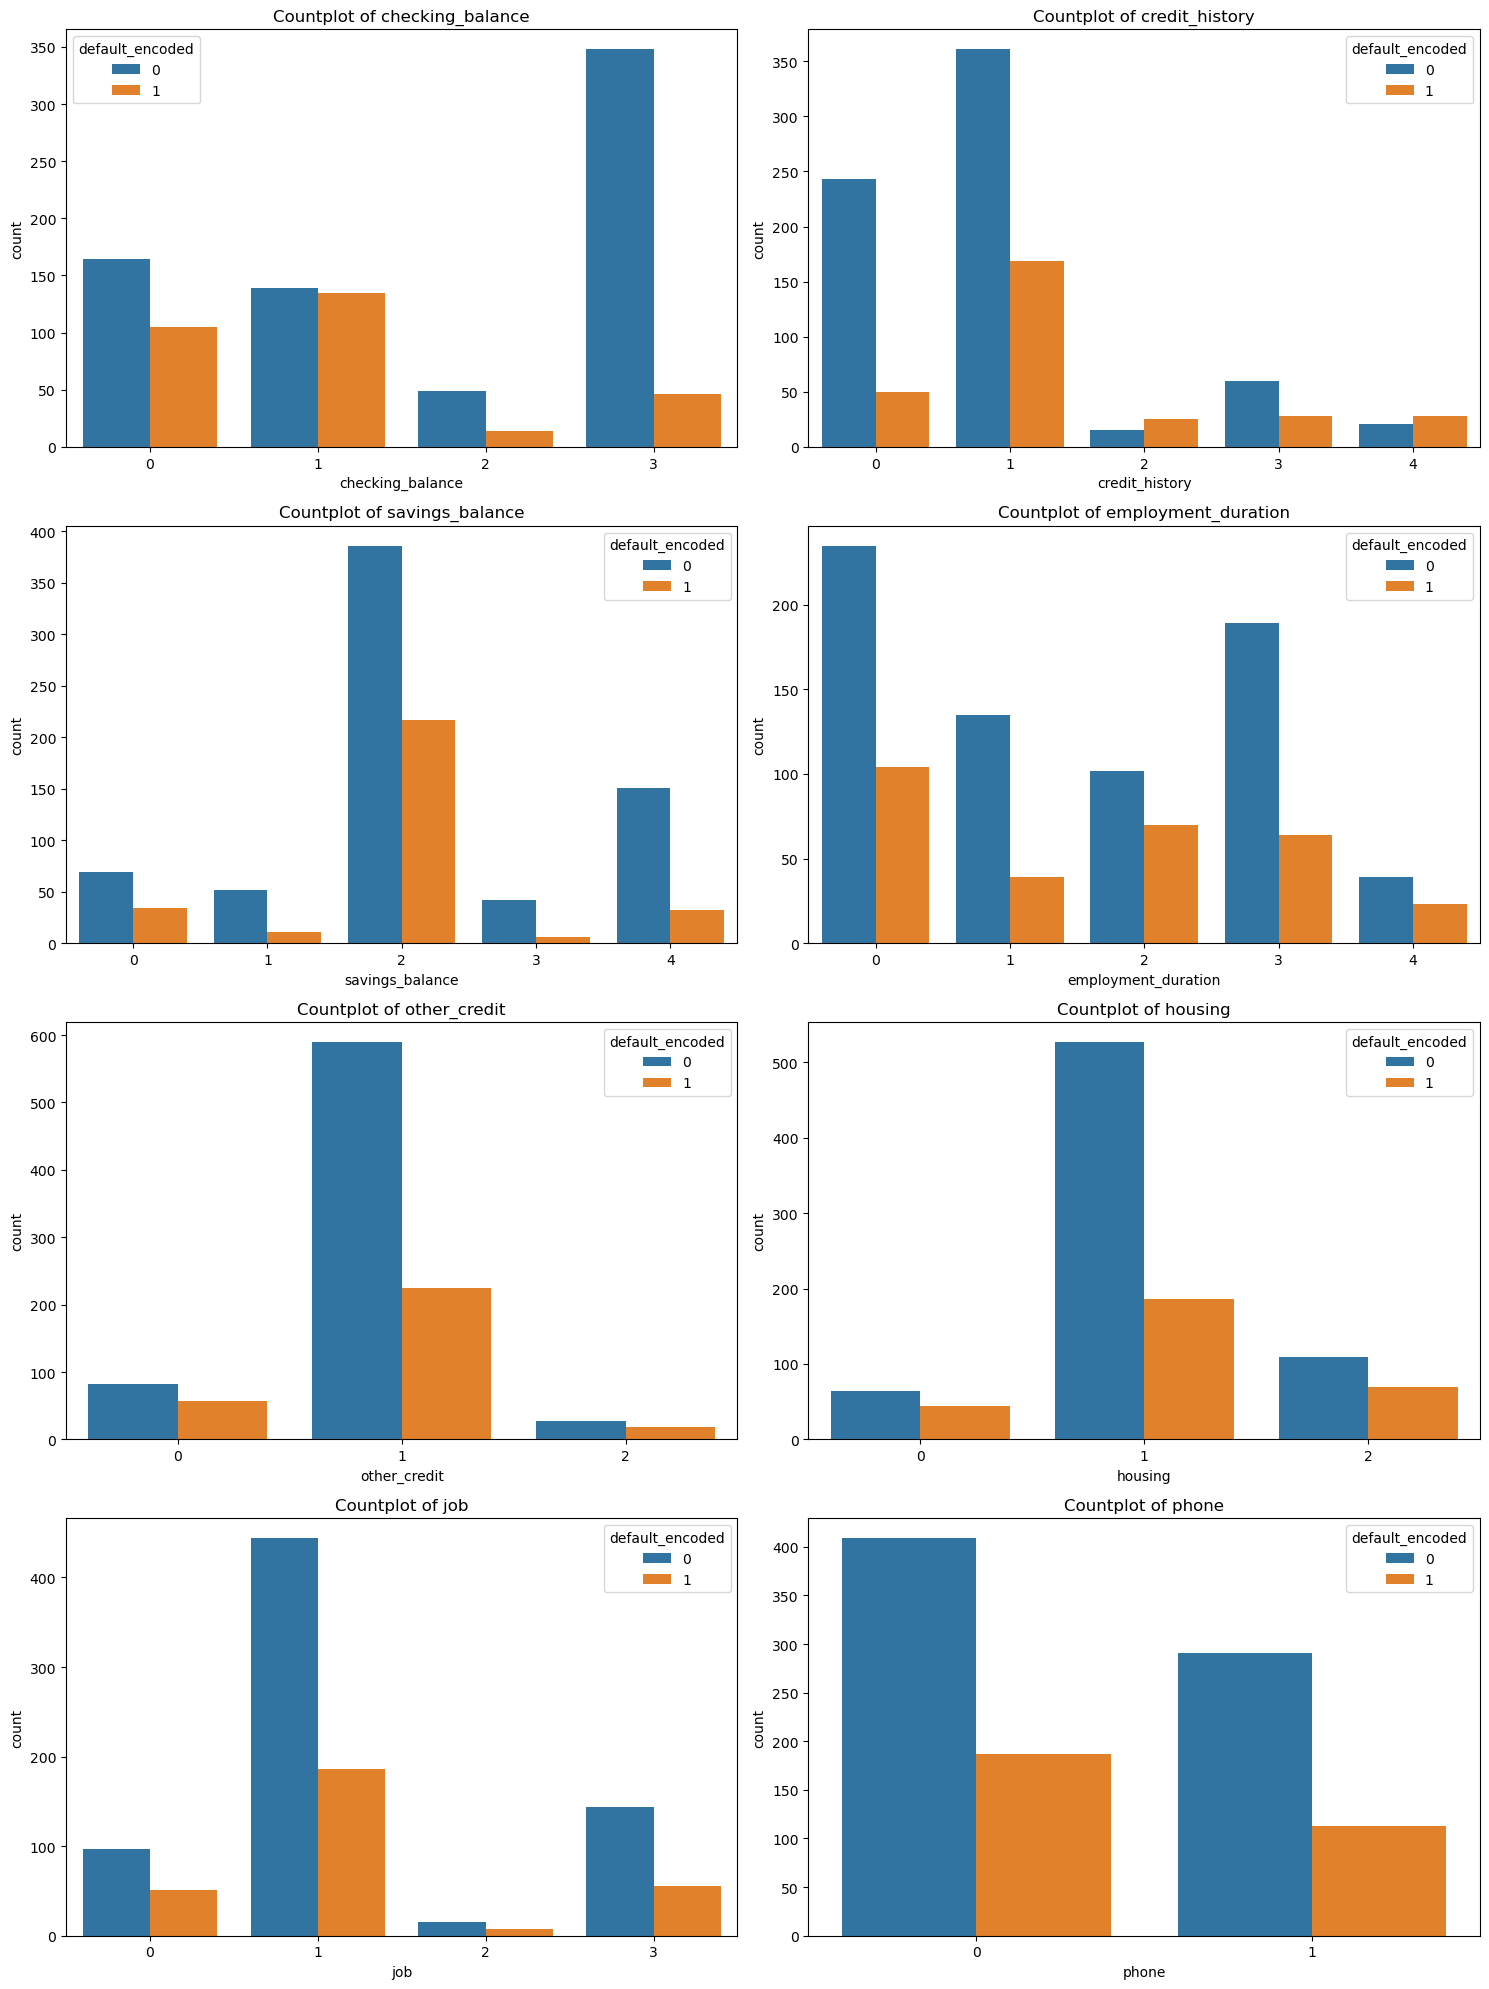

In [10]:
# Plot boxplots for categorical features based on default status
categorical_features = ['checking_balance', 'credit_history', 'savings_balance', 'employment_duration', 
                        'other_credit', 'housing', 'job', 'phone']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, hue='default_encoded', data=data)
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\likit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

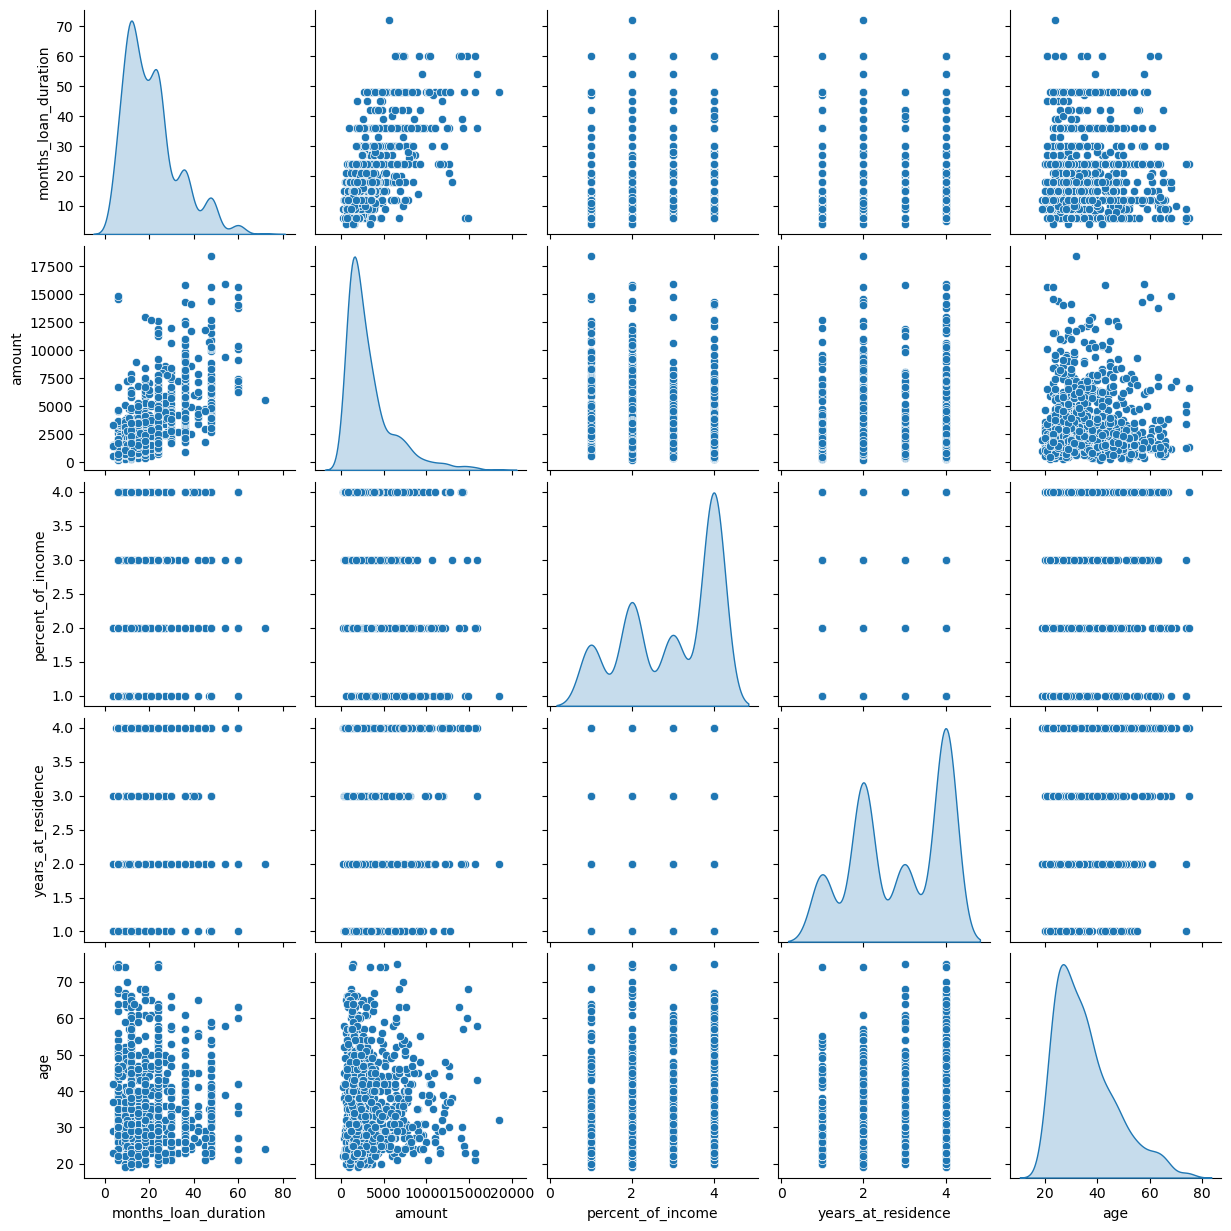

In [11]:
# Select numerical features for scatter plot matrix
numerical_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age']

# Create scatter plot matrix
sns.pairplot(data=data[numerical_features], diag_kind='kde')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=['default_encoded'])  # Features
y = data['default_encoded']  # Target

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features array to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [13]:
X_scaled_df.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,...,existing_loans_count,job,dependents,phone,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations
0,-0.464594,-1.236478,-1.010559,-0.745131,1.669901,1.097762,0.918477,1.046987,2.766456,0.218346,...,1.027079,-0.289639,-0.428290,1.214598,-0.327749,-0.712949,-0.110208,-0.250398,1.055540,-0.149983
1,-1.262865,2.248194,-0.066111,0.949817,-0.130531,-1.134975,-0.870183,-0.765977,-1.191404,0.218346,...,-0.704926,-0.289639,-0.428290,-0.823318,-0.327749,-0.712949,-0.110208,-0.250398,1.055540,-0.149983
2,1.131948,-0.738668,-1.010559,-0.416562,-0.130531,-0.390729,-0.870183,0.140505,1.183312,0.218346,...,-0.704926,1.824516,2.334869,-0.823318,-0.327749,-0.712949,-0.110208,3.993639,-0.947382,-0.149983
3,-0.464594,1.750384,-0.066111,1.634247,-0.130531,-0.390729,-0.870183,1.046987,0.831502,0.218346,...,-0.704926,-0.289639,2.334869,-0.823318,-0.327749,-0.712949,-0.110208,-0.250398,1.055540,-0.149983
4,-0.464594,0.256953,1.822784,0.566664,-0.130531,-1.134975,0.024147,1.046987,1.535122,0.218346,...,1.027079,-0.289639,2.334869,-0.823318,-0.327749,1.402626,-0.110208,-0.250398,-0.947382,-0.149983


In [16]:
X_scaled_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone',
       'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations'],
      dtype='object')

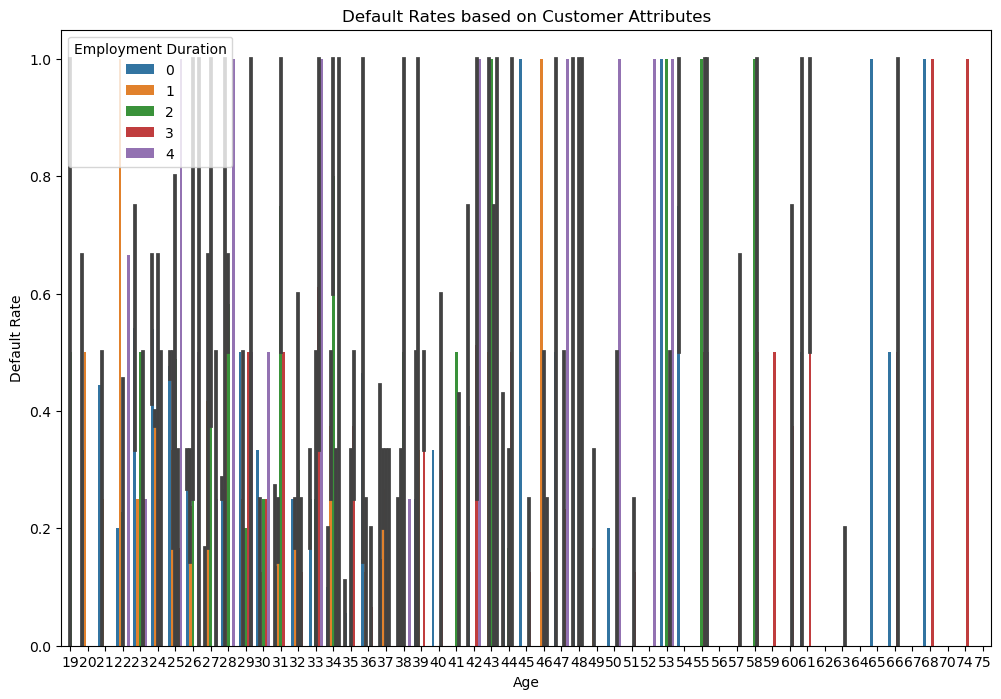

In [34]:
# Influence of customer attributes on loan default
customer_attributes = ['age', 'employment_duration', 'existing_loans_count']
default_rates_customer = data.groupby(customer_attributes)['default_encoded'].mean()

# Reset index to make grouping variables accessible
default_rates_customer_df = default_rates_customer.reset_index()

# Plotting default rates based on customer attributes
plt.figure(figsize=(12, 8))
sns.barplot(data=default_rates_customer_df, x='age', y='default_encoded', hue='employment_duration')
plt.title('Default Rates based on Customer Attributes')
plt.xlabel('Age')
plt.ylabel('Default Rate')
plt.legend(title='Employment Duration')
plt.show()

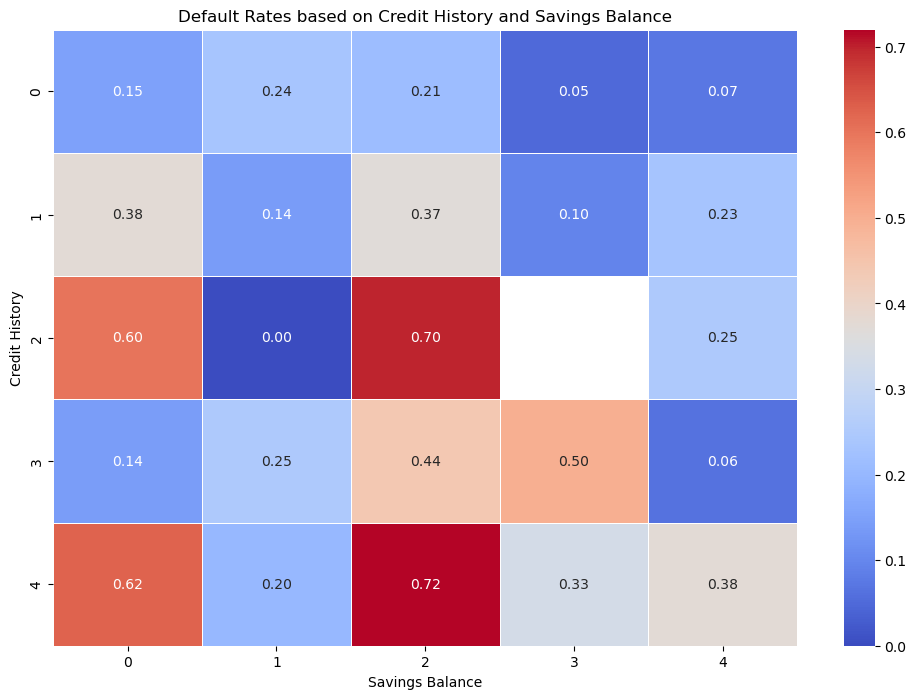

In [36]:
# Impact of credit history and savings balance on loan default rates
credit_savings_impact = data.groupby(['credit_history', 'savings_balance'])['default_encoded'].mean()
# Reset index to make grouping variables accessible
credit_savings_impact_df = credit_savings_impact.reset_index()

# Pivot the DataFrame for heatmap plotting
pivot_table = credit_savings_impact_df.pivot(index='credit_history', columns='savings_balance', values='default_encoded')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Default Rates based on Credit History and Savings Balance')
plt.xlabel('Savings Balance')
plt.ylabel('Credit History')
plt.show()

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=65)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Gradient Boos
      ting Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Gradient Boosting Model Performance:
Accuracy: 0.740
Precision: 0.564
Recall: 0.525
F1 Score: 0.544


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=65),
    "Logistic Regression": LogisticRegression(random_state=65),
    "Support Vector Machine": SVC(random_state=65),
    "Decision Tree": DecisionTreeClassifier(random_state=65)
}

# Dictionary to store performance metrics
performance_metrics = {}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train and evaluate each model
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store performance metrics
    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print performance metrics for each model
for name, metrics in performance_metrics.items():
    print(f"{name} Model Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall: {metrics['Recall']:.3f}")
    print(f"F1 Score: {metrics['F1 Score']:.3f}")
    print()

Random Forest Model Performance:
Accuracy: 0.780
Precision: 0.683
Recall: 0.475
F1 Score: 0.560

Logistic Regression Model Performance:
Accuracy: 0.750
Precision: 0.636
Recall: 0.356
F1 Score: 0.457

Support Vector Machine Model Performance:
Accuracy: 0.710
Precision: 0.517
Recall: 0.254
F1 Score: 0.341

Decision Tree Model Performance:
Accuracy: 0.755
Precision: 0.586
Recall: 0.576
F1 Score: 0.581



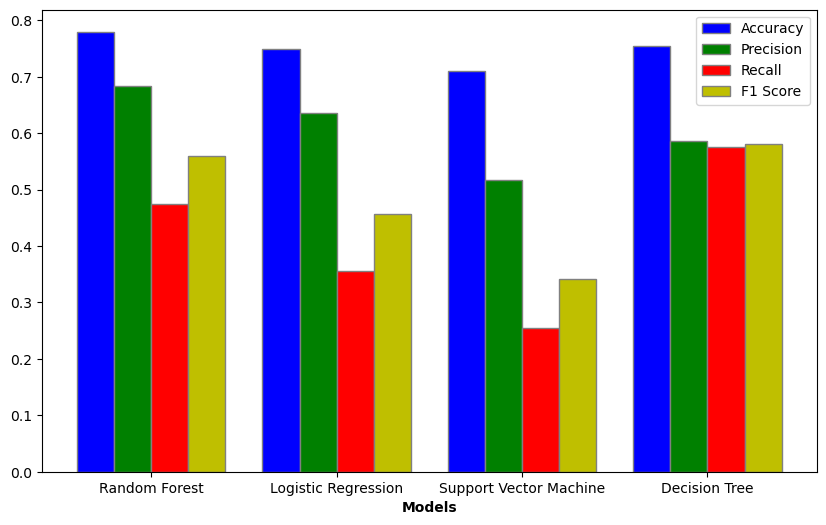

In [42]:
# Define model names
models = list(performance_metrics.keys())

# Extract performance metrics
accuracies = [metrics['Accuracy'] for metrics in performance_metrics.values()]
precisions = [metrics['Precision'] for metrics in performance_metrics.values()]
recalls = [metrics['Recall'] for metrics in performance_metrics.values()]
f1_scores = [metrics['F1 Score'] for metrics in performance_metrics.values()]

# Define bar width
bar_width = 0.2

# Set positions of bars on x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=bar_width, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(accuracies))], models)

# Add legend
plt.legend()

# Show plot
plt.show()